In [10]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# deep learning stack
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img 

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from tensorflow.keras import backend as K

K.clear_session()




First we will use a simple black tshirt and see how 3 models, resnet50, and vgg16 and mobilenetV2 do at predicting it.

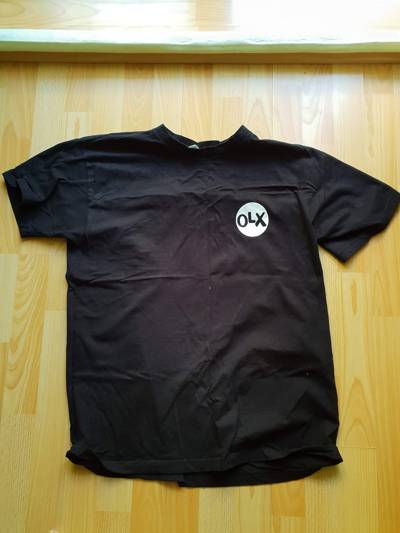

In [11]:
path = '../input/clothing-dataset-full/images_compressed'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name
load_img(fullname)

First lets import the models and set up funtions to resize and preprocess the image

**Load the models**

In [12]:
# vgg16
from tensorflow.keras.applications.vgg16 import VGG16

# resnet50
from tensorflow.keras.applications.resnet50 import ResNet50

# mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [13]:
# vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_pp
# resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_pp
# mobilenetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as MobileNetV2_pp


VGG16 requires an image size of 224x224 

In [14]:
def image_resizing(image_path):
    """
    This function resizes an input image to 224 X 224
    """
    img = image.load_img(image_path, target_size=(224,224))
    return img

Lets create a function for preprocessing 

In [15]:

PP_INPUT = {'vgg16': vgg16_pp,
            'resnet50': resnet50_pp,
            'mobilenetv2': MobileNetV2_pp
            }
 
def image_preprocessing(resized_image,model):
    """
    This function preprocesses the input image for ResNet50
    """
    X = image.img_to_array(resized_image)
    X = PP_INPUT[model](X)
    X = np.expand_dims(X, axis=0)
    return X

In [16]:
from tensorflow.keras.applications.resnet50 import decode_predictions

def image_class_prediction(model, preprocessed_image):
    """
    This function spits out the top-5 predictions for a given model with a proprocessed image
    """
    model_prediction = model.predict(preprocessed_image,verbose=0)
    decoded_prediction = decode_predictions(model_prediction,top=5)[0]
    data = {'image_class': [_[1] for _ in decoded_prediction],
            'probability': [_[2] for _ in decoded_prediction]
           }
    df = pd.DataFrame(data=data)
    return df

Here we build each models preprocessing requirements

In [17]:
vgg16_model = VGG16(
    include_top=True,
    weights='imagenet',
    classes=1000
)
#vgg16_model.summary()

553476096/553467096 [==============================] - 2s 0us/step


In [18]:
resnet50_model = ResNet50(
    include_top=True,
    weights="imagenet",
    classes=1000
)
#resnet50_model.summary()

102981632/102967424 [==============================] - 1s 0us/step


In [33]:
mobilenetv2_model = MobileNetV2(
    include_top=True,
    weights="imagenet",
    classes=1000
)
#resnet50_model.summary()


In [20]:
# preprocess an image
preprocessed_img1 = image_preprocessing(resized_image,'resnet50')

# class prediction
image_class_prediction(resnet50_model, preprocessed_img1)

49152/35363 [=========================================] - 0s 0us/step


,image_class,probability
0,jersey,0.813238
1,sweatshirt,0.095169
2,sleeping_bag,0.027393
3,bulletproof_vest,0.006747
4,maillot,0.005254


In [21]:
# preprocess an image
preprocessed_img2 = image_preprocessing(resized_image,'vgg16')

# class prediction
image_class_prediction(vgg16_model, preprocessed_img2)

,image_class,probability
0,sweatshirt,0.328015
1,jersey,0.322343
2,sleeping_bag,0.206186
3,backpack,0.035009
4,bulletproof_vest,0.020203


In [35]:
# preprocess an image
preprocessed_img2 = image_preprocessing(resized_image,'mobilenetv2')

# class prediction
image_class_prediction(mobilenetv2_model, preprocessed_img2)

,image_class,probability
0,cardigan,0.126764
1,velvet,0.102521
2,backpack,0.076273
3,sweatshirt,0.073985
4,maillot,0.060551


'resnet50' is 'apparently' much more certain than 'vgg16' and mobilenetv2 is even worse.both are not identifying the T-shirt correctly.
First lets try with some other images then we can move on and  see if we can train it a bit more to get a better result.

To speed things up lets build a function for this:

In [22]:
from tensorflow.keras import backend as K

K.clear_session()

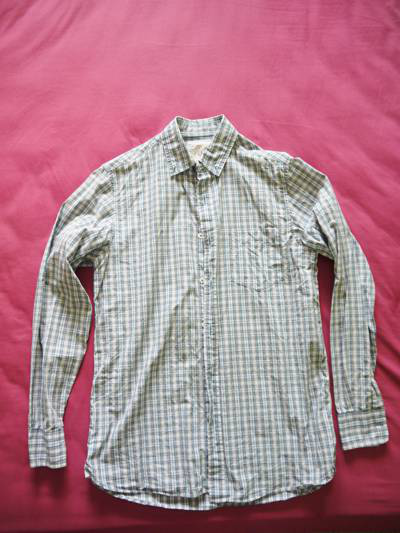

In [23]:
path = '../input/clothing-dataset-full/images_compressed'
name = '0d24634d-4daa-41bc-8acf-61b8382e0419.jpg'
fullname = path + '/' + name
#fullname =('/home/nathan/Random_Rose/spiced_projects/week9/train/shirt/e5f6e679-cc48-4ea8-920e-670aa21ca0e0.jpg')
load_img(fullname)

this is a fuction using the functions we defined earlier

In [24]:
def predictor_resnet50(item):
    resized_image = image_resizing(item)
    preprocessed_img1 = image_preprocessing(resized_image,'resnet50')
    final = image_class_prediction(resnet50_model, preprocessed_img1)

    return final

In [25]:
def predictor_vgg16(item):
    resized_image = image_resizing(item)
    preprocessed_img2 = image_preprocessing(resized_image,'vgg16')
    final = image_class_prediction(vgg16_model, preprocessed_img2)

    return final

In [38]:
def predictor_mobilenet(item):
    resized_image = image_resizing(item)
    preprocessed_img1 = image_preprocessing(resized_image,'mobilenetv2')
    final = image_class_prediction(mobilenetv2_model, preprocessed_img1)

    return final

In [27]:
predictor_resnet50(fullname)

,image_class,probability
0,apron,0.310954
1,backpack,0.111518
2,swab,0.104366
3,overskirt,0.061340
4,mailbag,0.046785


In [28]:
predictor_vgg16(fullname)

,image_class,probability
0,cardigan,0.650423
1,wool,0.169057
2,velvet,0.053487
3,sweatshirt,0.015786
4,bonnet,0.013439


In [39]:
predictor_mobilenet(fullname)

,image_class,probability
0,cardigan,0.126764
1,velvet,0.102521
2,backpack,0.076273
3,sweatshirt,0.073985
4,maillot,0.060551


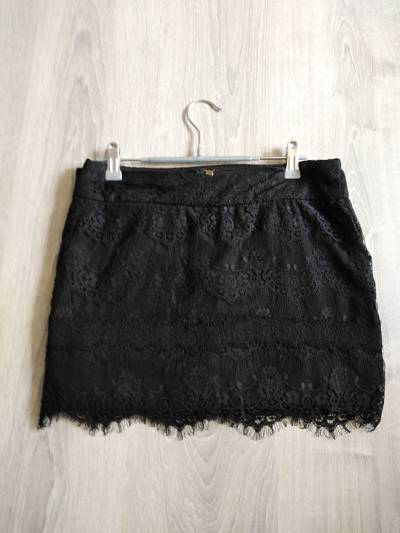

In [40]:
shoes=('../input/clothing-dataset-full/images_compressed/1e3ce182-d152-4476-8b6c-be3be197debf.jpg') # pink slippers
shorts=('../input/clothing-dataset-full/images_compressed/00f4bb77-5cbd-4c81-98b5-42647b8d0c64.jpg') # swiming trunks
skirt=('../input/clothing-dataset-full/images_compressed/6f7e039f-85a2-47dd-9cc2-b2cbd64367a5.jpg') # short black skirt
hat=('../input/clothing-dataset-full/images_compressed/1febd681-151b-4c8c-baff-ddc52d16c6c0.jpg') #red reebok cap
dress=('../input/clothing-dataset-full/images_compressed/2b66fdb1-33dd-445f-a422-b17fbe543483.jpg') # black sleeveless dress
load_img(skirt)

In [41]:
predictor_resnet50(skirt)


,image_class,probability
0,bath_towel,0.316068
1,miniskirt,0.288054
2,purse,0.100495
3,velvet,0.058140
4,shower_curtain,0.031502


In [42]:
predictor_vgg16(skirt)

,image_class,probability
0,swimming_trunks,0.178850
1,broom,0.147603
2,miniskirt,0.107850
3,swab,0.101668
4,purse,0.091869


In [43]:
predictor_mobilenet(skirt)

,image_class,probability
0,purse,0.355308
1,miniskirt,0.151003
2,velvet,0.083881
3,mailbag,0.070673
4,overskirt,0.035071


After multiple different images tested as shirts and tshirts and all incorrect its time to see if we can do better.

Lets Train the model with our labeled data

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,  
)

train_ds = train_gen.flow_from_directory(
    "../week9/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

validation data

In [ ]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "../week9/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)